In [1]:
## import load !
import pandas as pd
import schedule
import openpyxl
import re
import requests
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.service import Service
#from webdriver_manager.chrome import ChromeDriverManager

import datetime
from datetime import datetime as dtime
from datetime import timedelta
from dateutil.parser import parse
from time import strptime
import pytz

import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk import sent_tokenize

import time
import pymysql

In [35]:
# 로컬 DB TEST 접속
db = pymysql.connect(host='127.0.0.1',  port = 3306 , user = 'root',
                           password = "1234", db = 'jisoo', charset = 'utf8')


headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
        'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}



In [38]:
google_etf_news_crawler_main(db)

20221117 20221124
https://www.google.com/search?q=TQQQ etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
1
소요시간 37 회피 탐지 중... 1
https://www.google.com/search?q=TQQQ etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=10&gl=us
0
회피 탐지 1
https://www.google.com/search?q=SQQQ etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
소요시간 35 회피 탐지 중... 1
https://www.google.com/search?q=SQQQ etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=10&gl=us
0
소요시간 50 회피 탐지 중... 2
https://www.google.com/search?q=SQQQ etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=20&gl=us
0
회피 탐지 3
https://www.google.com/search?q=SOXL etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
1
소요시간 56 회피 탐지 중... 1
https://www.google.com/search?q=SOXL etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=10&gl=us
0
회피 탐지 4
https://www.google.com/search?q=SPY etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws

0
소요시간 35 회피 탐지 중... 1
https://www.google.com/search?q=SLV etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=10&gl=us
0
소요시간 34 회피 탐지 중... 2
https://www.google.com/search?q=SLV etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=20&gl=us
0
소요시간 38 회피 탐지 중... 3
회피 탐지 47
https://www.google.com/search?q=SOXS etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
소요시간 56 회피 탐지 중... 1
https://www.google.com/search?q=SOXS etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=10&gl=us
0
회피 탐지 48
https://www.google.com/search?q=IEMG etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
1
회피 탐지 48
https://www.google.com/search?q=GOVT etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
2
회피 탐지 48
https://www.google.com/search?q=VWO etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
2
회피 탐지 48
https://www.google.com/search?q=XLU etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nw

0
회피 탐지 53
https://www.google.com/search?q=SPTL etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
회피 탐지 53
https://www.google.com/search?q=EWG etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
회피 탐지 53
https://www.google.com/search?q=ACWI etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
회피 탐지 53
https://www.google.com/search?q=TBT etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
회피 탐지 53
https://www.google.com/search?q=PDBC etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
회피 탐지 53
https://www.google.com/search?q=VEU etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
회피 탐지 53
https://www.google.com/search?q=IVV etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
회피 탐지 53
https://www.google.com/search?q=JPST etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/24/2022&tbm=nws&start=0&gl=us
0
회피 탐지 53
https://www.google.com/search?q=S

20221117 20221122
https://www.google.com/search?q=QQQ etf&tbs=cdr:1,cd_min:11/17/2022,cd_max:11/22/2022&tbm=nws&start=0&gl=us
<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>QQQ etf - Google Search</title><script nonce="3buNLjSuQ6ci_aukKYEO4A">(function(){window.google={kEI:'BWp9Y47_GtTi2roPmuKfQA',kEXPI:'0,3700294,655,363778,16311,80902,2823,84975,4419,33853,30848,68102,55457,6671,21841,65898,9410,13913,14084,12996,23420,58948,42213,9911,58103,3298,26671,5811,17114,2099,2181,1638,5390,4351,7409,3489,6191,571,842,1305,2388,3037,622,4210,933,1328,1757,1751,934,199,458,385,402,3296,2231,922,91,9,2671,191,1004,724,782,1806,707,181,237,702,87,198,1018,353,88,152,147,530,4,121,123,73,208,578,192,428,190,32,776,134,32,24,126,1267,86,5296539,416,8825373,707,4,4,358,36,18,22,72,2671
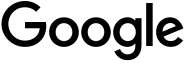
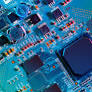

In [34]:
start_date_input = 20221117
end_date_input = 20221122
print(start_date_input, end_date_input)

page_num = 1

category = 'etf_news'

symbol = 'QQQ'
query = symbol +' '+'etf'  # 검색어 
google_news_crawler(db , symbol, query, start_date_input, end_date_input, page_num,  category)


In [25]:
symbol_list = symbols_load()

for i in range(len(symbol_list)):
    symbols = symbol_list[i]
    if symbols == 'XLV':
        print(i)

46


In [28]:
## 랜덤 난수 시간 쉬기 
import random

for i in range(10):
    random_time = int(random.uniform(10,60))
    print(random_time)
    #time.sleep( random.uniform(2,4) )   # 2~4초 사이 랜덤한 시간으로  쉬어줘


29
26
13
31
30
51
22
33
32
54


In [37]:
def google_etf_news_crawler_main(db):
    symbol_list = symbols_load()
    usa_est = dtime.now(pytz.timezone('America/New_York'))
    yesterday = timedelta(days = 1)
    usa_est_yesterday = usa_est - yesterday

    start_date_input =  google_date_time_str(usa_est_yesterday)
    end_date_input = google_date_time_str(usa_est)
    
    avoid_cnt = 0
    start_date_input = 20221117
    end_date_input = 20221124
    print(start_date_input, end_date_input)

    page_num = 3

    category = 'etf_news'

    for s in range(len(symbol_list)):
        symbol = symbol_list[s]
        query = symbol +' '+'etf'  # 검색어 
        g_cnt = google_news_crawler(db , symbol, query, start_date_input, end_date_input, page_num,  category)
        avoid_cnt += g_cnt
        print('회피 탐지', avoid_cnt)

In [36]:
### 추가되는 함수들 ###
def google_news_crawler(db , symbol, query, start_date_input, end_date_input, page_num,  category):
    start_date = google_date_process(start_date_input)# 시작 날짜   월 일 년도
    end_date = google_date_process(end_date_input) # 마지막 날짜   월 일 년도
    avoid_ip_cnt = 0

    for p in range(page_num):
        random_time = int(random.uniform(30,60))
        page_cnt = p * 10 
        url = "https://www.google.com/search?q=" + query +  "&tbs=cdr:1,cd_min:" + start_date +  ",cd_max:" + end_date +  "&tbm=nws&start=" + str(page_cnt) +"&gl=us"
        print(url)
        purl, no_ = google_crawling(url, headers)
        print(len(purl))
        if no_ == 1 :
            break # 더이상 페이지 없음 
        # 각 뉴스 언론사/주소를 통해 아웃링크 함수 입력 -> 아래엔 임의의 예시 
        parser_runing = outlink_parsing(db, purl, symbol, category)
        avoid_ip_cnt += 1
        print('소요시간',random_time, '회피 탐지 중...', avoid_ip_cnt)
        time.sleep(random_time) # 10 ~ 60 에서 랜덤한 숫자만큼 쉬기 : 페이지당 
    return avoid_ip_cnt
        
def google_crawling(url, headers):
    c_press_list = ['Nasdaq', 'ETF Trends', 'FXStreet', 'ETF Daily News','Compound Advisors', 'Benzinga', 'Equities News', 'MoneyShow',
                'The Motley Fool', 'Entrepreneur',  'Yahoo Finance']
    purl_list = []
    break_cnt = 0
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    #print(soup)

    for i in range(10): # 기본 1페이지당 10 개의 글
        find_select_url = '#rso > div > div > div:nth-child('+str(i+1)+') > div > div > a'
        find_select_press = find_select_url  + ' > div > div > div.CEMjEf.NUnG9d'

        date_find_url = soup.select(find_select_url)
        date_find_press = soup.select(find_select_press)
        if len(date_find_url) == 0: # 더 이상 뉴스 게시글이 없을 때, 
            break_cnt = 1
            break
        news_link = date_find_url[0]['href']
        news_press = date_find_press [0].text

        if news_press not in c_press_list:
            continue
    
        press_data = [news_press, news_link ] 
        purl_list.append(press_data)
    return purl_list, break_cnt

def google_date_process(date_input):
    years, month, days = str(date_input)[:4], str(date_input)[4:6], str(date_input)[6:]
    str_date = month + '/' + days + '/' + years 
    
    return str_date
        
def newsdate_preprocessing(dt):
    dt = dt.replace('T', ' ')
    dt = dt.replace('+09:00', '')
    dt = datetime.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
    return dt

def news_duplicate_check(db, url, ticker):
    # db에 url 가 있다면 break! ]
    checking_sql = "SELECT * FROM US_Stock_Market_News WHERE url = '" + url + "' and symbol ='" + ticker + "'"

    cur = db.cursor()
    cur.execute(checking_sql)
    result = cur.fetchall()

    if len(result) >= 1:
        result = 1  # 1이면 contine
    else:
        result = 0
    return result


def symbols_load():
    etf_path = './data/ETF_top100_sample.xlsx'
    df = pd.read_excel(etf_path)

    symbol_list = []

    for d in range(len(df['Symbol'])):
        ticker = df['Symbol'].iloc[d]
        symbol_list.append(ticker)
    return symbol_list


def google_date_time_str(time_pre):
    month = date_zero_padding(time_pre.month)
    days = date_zero_padding(time_pre.day)
    year = date_zero_padding(time_pre.year)
    ymd_date = str(year) + str(month)  + str(days)
    
    return ymd_date

In [39]:

def outlink_parsing(db, purl, symbol,category):
    news_info_list =[]
    #print()
    for i in range(len(purl)):
        press_t = purl[i][0]
        url_t =  purl[i][1]
        news_checking = news_duplicate_check(db, url_t, symbol)
        if news_checking == 1:
            continue  # 중복된 url + 종목의 뉴스가 있다면 스킵
        #print(url_t, press_t)
        ## 아웃링크 파서 함수     
        if press_t == 'Yahoo Finance':
            news_info = fyahoo_stock_news_inlink_extract(url_t, headers)

        if press_t == 'Nasdaq':
            news_info = nasdaq_news_parser(url_t, headers, press_t)

        if press_t == 'ETF Trends':
            news_info = etf_trands_news_parser(url_t, headers, press_t)

        if press_t == 'ETF Daily News':
            news_info = etf_daily_news_parser(url_t, headers, press_t)
        try:
            if press_t =='The Motley Fool':
                news_info = the_montley_fool_news_parser(url_t, headers, press_t)
        except:
            print('date time missing')
            continue
        try:
            if press_t == 'Benzinga':
                news_info = benzinga_news_parser(url_t, headers, press_t)
        except:
            print('date time missing')
            continue

        if press_t == 'Equities News':
            news_info = equities_news_parser(url_t, headers, press_t)
        try:  
            if press_t == 'MoneyShow':
                news_info = moneyshow_news_parser(url_t, headers, press_t)
        except:
            # 날짜 에러 : 확인이 불가능한 경우
            print('date time missing')
            continue
        try:
            if press_t == 'Fxstreet':
                news_info = fxstreet_news_parser(url_t, headers, press_t)
        except:
            # 날짜 에러 : 확인이 불가능한 경우
            print('date time missing')
            continue

        if press_t == 'Entrepreneur':
            news_info = entrepreneur_news_parser(url_t, headers, press_t)

        if press_t == 'Compound Advisors':
            news_info = compound_advisors_news_parser(url_t, headers, press_t)
        try: 
            nurl, title, body, w_date, n_date, press = news_info[0], news_info[1], news_info[2], news_info[3], news_info[4], news_info[5]
            news_info_input = stock_news_insert(db, nurl, title, body, w_date, n_date, press, category, symbol)
            news_info_list.append(news_info)
        except: 
            print(purl[i])
            continue
    return news_info_list

In [3]:
## 아웃링크 파서 : 221116 기준 10개 (야후 파이낸스 제외)

# Nasdaq
def nasdaq_news_parser(url, headers, press): #v2

    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('time' )

    if dt == None:
        dt = soup.find('p',{'class':'jupiter22-c-author-byline__timestamp'} )
        dt_text = dt.text.replace(',','')
        dt_split =  dt_text.split('—')
        time_split = dt_split[1].split(' ')[1]
        ampm = dt_split[1].split(' ')[2]
        if ampm == 'am':
            time_stamp = time_split
        if ampm == 'pm':
            time_hour = time_split.split(':')[0]
            if time_hour == '12':
                hour = time_hour
            else:
                hour = str(int(time_hour) + 12) 
            time_stamp = hour + ':' + time_split.split(':')[1]
        dt_string = dt_split[0].strip()  + ' ' + time_stamp 
        
        datetime_type = dtime.strptime(dt_string, '%B %d %Y %H:%M')
      
            
    else:
        dt = dt.text
        if dt.find('AM') >= 0:
            dt_string = dt.split('AM')[0]
        if dt.find('PM') >= 0:
            date_fram = dt.split('PM')[0]
            date_split = date_fram.split(' ')
            time_split = date_split[2].split(':')
            if time_split[0] == '12':
                hour = time_split[0] 
            else:
                hour = str(int(time_split[0])+ 12)
            time_hm = hour + ':' + time_split[1]
            dt_string = date_split[0] + ' ' + date_split[1] + ' ' + time_hm
        datetime_type = dtime.strptime(dt_string, '%b %d, %Y %H:%M')

    #  본문 
    conts = soup.find('div', {'class' : 'body__content'})
    body_p = conts.find_all('p')
    body = ''

    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('please visit') >= 0:
            break
        if i == 0:
            body = text
        else:
            body = body + ' '+text
    body = body.replace('\n','')        
    news_data = [url, title, body, datetime_type, now, press]
    
    return news_data

# ETF Trends    

def etf_trands_news_parser(url, headers, press):
    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('meta', property='article:published_time')
    dt = dt['content']
    dt_split = dt.split('T')
    dt_ymd = dt_split[0]
    dt_time = dt_split[1].split('+')[0]
    #dt = newsdate_preprocessing(dt)
    dt_string = dt_ymd + ' '+dt_time 
    datetime_type = dtime.strptime(dt_string, '%Y-%m-%d %H:%M:%S')

    #  본문 
    conts = soup.find('div', {'class' : 'post-content post-dynamic description'})
    body_p = conts.find_all('p')
    body = ''

    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('For more news') >= 0:
            break
        if i == 0:
            body = text
        else:
            body = body + ' '+ text
            
    news_data = [url, title, body, datetime_type, now, press]
    
    return news_data

# ETF Daily News

def etf_daily_news_parser(url, headers, press):
    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('meta', property='article:published_time')
    dt = dt['content']
    dt_split = dt.split('T')
    dt_ymd = dt_split[0]
    dt_time = dt_split[1].split('+')[0]
    dt_string = dt_ymd + ' '+dt_time 
    datetime_type = dtime.strptime(dt_string, '%Y-%m-%d %H:%M:%S')
    
    #  본문 
    conts = soup.find('div', {'class' : 'entry'})
    body_p = conts.find_all('p')
    body = ''

    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('FREE') >= 0:
            break
        if i == 0:
            body = text
        else:
            body = body + ' '+text
    body = body.replace('\n','')
    
    news_data = [url, title, body, datetime_type, now, press]
    
    return news_data

#  The Motley Fool

def the_montley_fool_news_parser(url, headers, press):
    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('meta',{'name' :'date'})
    dt = dt['content']
    dt_split = dt.split('T')
    dt_ymd = dt_split[0]
    dt_time = dt_split[1].split('+')[0].replace('Z','')
    dt_string = dt_ymd + ' '+dt_time
    datetime_type = dtime.strptime(dt_string, '%Y-%m-%d %H:%M:%S')

    #  본문 
    conts = soup.find('div', {'class' : 'md:w-3/4 md:pr-80'})

    body_p = conts.find_all('p')
    body = ''

    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('no position') >= 0:
            break
        if i == 0:
            body = text
        else:
            body = body + ' '+text
            
    news_data = [url, title, body, datetime_type, now, press]        
    return news_data

#  Benzinga
def benzinga_news_parser(url, headers, press):    
    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('span',{'class' :'date'})
    dt_text = dt.text
    if dt_text.find('PM') >= 1:
        dt_text =  dt_text.replace('PM','')
        dt_string = dt_text.strip()
        time_split = dt_string.split(' ')
        time_num = time_split[-1].split(':')
        if time_num[0] == '12':
            hour = time_num[0]
        else:
            hour = str(int(time_num[0]) + 12) 
        minute = time_num[1]
        dt_string = time_split[0] + ' ' + time_split[1] + ' '+ time_split[2] + ' ' + hour + ':' + minute

    if dt_text.find('AM') >= 1:
        dt_text =  dt_text.replace('AM','')
        dt_string = dt_text.strip()

    datetime_type = dtime.strptime(dt_string, '%B %d, %Y %H:%M')

    #  본문 
    conts = soup.find('div', {'class' : 'ArticleBody__ArticleBodyDiv-sc-l6jpud-0 fZXicg article-content-body-only'})
    body_p = conts.find_all('p')
    body = ''

    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('Read Next') >= 0:
            break
        if i == 0:
            body = text
        else:
            body = body + ' '+text
    body = body.replace('\xa0','')
    
    news_data = [url, title, body, datetime_type, now, press] 
    
    return news_data

#  Equities News
def equities_news_parser(url, headers, press):
    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('meta', {'name':'article.published'})
    dt = dt['content']
    datetime_type = newsdate_preprocessing(dt )

    #  본문 
    conts = soup.find_all('p')
    del_a = soup.find('p', {'class':'text-center margin-top-20'}).decompose()
    del_b = soup.find('p', {'id':'signupSuccessMessageText'}).decompose()
    del_c = soup.find('p', {'id':'modsignupErrorMessageText'}).decompose()
    del_d = soup.find('p', {'class':'text small'}).decompose()
    conts = soup.find_all('p')

    body_list = []
    body = ''

    for b in range(len(conts)):
        p_text = conts[b].text.strip()
        if p_text.find('DISCLOSURE') >= 0:
            break
        if len(p_text) == 0:
            continue
        body_list.append(p_text)

        if b == 0:
            body = p_text
        else:
            body = body + ' ' + p_text
    body = body.replace('\xa0', ' ')

    news_data = [url, title, body, datetime_type, now, press] 
    
    return news_data

#  MoneyShow   - > 기사 내용이 너무 적음... 일단 ...
    
def moneyshow_news_parser(url, headers, press):
    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('div',{'class' :'my-2 text-muted font-roboto font-14'})
    dt = dt.find('span')
    dt_text = dt.text
    date_split_list = dt_text.split(' ')
    ymd_s, time_s, ampm  = date_split_list [0], date_split_list [1], date_split_list [2]
    ymd_three = ymd_s.split('/')
    dt_ymd = ymd_three[2] + '-' + ymd_three[0]  + '-' + ymd_three[1]  
    if ampm == 'am' :
        dt_time = time_s
    if ampm == 'pm':
        ts_list = time_s.split(':')
        if ts_list[0] == '12':
            hour = ts_list[0] 
        else:
            hour = str(int(ts_list[0]) + 12)
        dt_time = hour + ':' + ts_list[1]
    dt_string = dt_ymd + ' '+ dt_time
    datetime_type = dtime.strptime(dt_string, '%Y-%m-%d %H:%M')

    #  본문 
    conts = soup.find('div', {'class' : 'mt-4 pt-4 font-roboto article-body'})
    body_p = conts.find_all('p')
    body = ''

    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('To learn more') >= 0:
            break
        if i == 0:
            body = text
        else:
            body = body + ' '+text
    body = body.replace('\xa0','')
    news_data = [url, title, body, datetime_type, now, press] 
    
    return news_data


#  Fxstreet
    
def fxstreet_news_parser(url, headers, press):
    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('time')
    dt = dt['datetime']
    dt_split = dt.split('T')
    dt_ymd = dt_split[0]
    dt_time = dt_split[1].split('+')[0].replace('Z','')
    dt_string = dt_ymd + ' '+dt_time
    datetime_type = dtime.strptime(dt_string, '%Y-%m-%d %H:%M:%S')

    #  본문 
    conts = soup.find('div', {'id' : 'fxs_article_content'})
    body_p = conts.find_all('p')
    body = ''

    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('WSJ') >= 0:
            break
        if i == 0:
            body = text
        else:
            body = body + ' '+text
    body = body.replace('\xa0',' ')
    news_data = [url, title, body, datetime_type, now, press] 
    
    return news_data

#  Entrepreneur
    
def entrepreneur_news_parser(url, headers, press):
    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('meta', property='article:published_time')
    dt = dt['content']
    dt = dt.replace('T', ' ')
    dt = dt.replace('+', '')
    dt = dt.replace('00:00', '')
    datetime_type = dtime.strptime(dt, '%Y-%m-%d %H:%M:%S')

    #  본문 
    conts = soup.find('div', {'class' : 'max-w-3xl prose prose-blue text-lg leading-8 mb-8'})
    body_p = conts.find_all('p')
    body = ''

    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('Learn more') >= 0:
            break
        if i == 0:
            body = text
        else:
            body = body + ' '+text
    body = body.replace('\xa0','')
    body = body.replace('\n\n','')
    news_data = [url, title, body, datetime_type, now, press] 
    
    return news_data

#  Compound Advisors

def compound_advisors_news_parser(url, headers, press):
    now = dtime.now()
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    #  제목
    title = soup.find("meta", property="og:title")
    title = title['content']

    #  날짜 
    dt = soup.find('meta', property='article:published_time')
    dt = dt['content']
    dt = dt.replace('T', ' ')
    dt = dt.replace('+', '')
    dt = dt.replace('00:00', '')
    dt_split = dt.split(' ')
    times = dt_split[1].split('-')[0]
    dt = dt_split[0]+ ' ' +times
    datetime_type = dtime.strptime(dt, '%Y-%m-%d %H:%M:%S')

    #  본문 
    conts = soup.find('div', {'class' : 'single-content content'})
    body_p = conts.find_all('p')
    body = ''

    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('click here') >= 0:
            continue
        if i == 0:
            body = text
        else:
            body = body + ' '+text
    body = body.replace('\xa0','')
    body = body.replace('\n\n','')
    
    news_data = [url, title, body, datetime_type, now, press] 
    
    return news_data


In [2]:

################### 시장 시간대 구역 ############################
# 시간 관련 라이브러리에서 종종 1자리수 숫자에 0 안붙이는거 해결...
def date_zero_padding(m):
    if m < 10:
        m = '0' + str(m)
    else:
        m = str(m)
    return m


# 노멀한 메타 데이터에서 시간 추출
def yahoo_market_time(url):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    datetimes = soup.find("time")
    datetimes = datetimes['datetime']
    dt = datetimes.split('T')
    d = dt[0]
    t = dt[1].split('.')
    t = t[0]
    dt = d + ' ' + t
    dt = dtime.strptime(dt, '%Y-%m-%d %H:%M:%S')
    one_hour_ago = dt - datetime.timedelta(hours=4)
    date_time = one_hour_ago  # html에서 GMT 기준으로 나오기에, -4 시간 빼야 미국 현재 시각, 표기로는 GMT+9 를 따름
    return date_time


def yahoo_market_search_time(url, market_time):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    if market_time == 0:
        market_time = ['00:10:00', '00:20:00']
    datetimes = soup.find("time")
    datetimes = datetimes['datetime']
    dt = datetimes.split('T')
    d = dt[0]
    t = dt[1].split('.')
    t = t[0]
    dt = d + ' ' + t
    dt = dtime.strptime(dt, '%Y-%m-%d %H:%M:%S')
    one_hour_ago = dt - datetime.timedelta(hours=4)
    date_time = one_hour_ago  # html에서 GMT 기준으로 나오기에, -4 시간 빼야 미국 현재 시각, 표기로는 GMT+9 를 따름

    start_hms = market_time[0]
    end_hms = market_time[1]
    # start_hms = '16:00:00'
    # end_hms = '16:30:00'
    usa_est = datetime.datetime.now(pytz.timezone('America/New_York'))
    ymd_date = str(usa_est.year) + '-' + str(usa_est.month) + '-' + str(usa_est.day)

    limit_start = ymd_date + ' ' + start_hms
    limit_end = ymd_date + ' ' + end_hms

    limit_start = dtime.strptime(limit_start, '%Y-%m-%d %H:%M:%S')
    limit_end = dtime.strptime(limit_end, '%Y-%m-%d %H:%M:%S')

    return date_time, limit_start, limit_end


###################핀 비즈 구역 ############################

def finviz_news_crawler(db, category, ticker_list, ymd_date):
    news_info_list = []
    error_cnt = 0

    for t in range(len(ticker_list)):
        ticker = ticker_list[t][0]
        # ticker, s_name, s_code = ticker_list[1][0], ticker_list[1][1], ticker_list[1][2]
        try:
            fin_dic = finviz_news_crawling(ticker, ymd_date)
        except:
            error_cnt += 1
            print('[' + str(error_cnt) + ']', ticker)

            continue
        if len(fin_dic) == 0:
            continue  # 오늘 데이터 없으면 다음 티커 를 탐색
        p_list = fin_dic[ymd_date]

        for u in range(len(p_list)):
            url = p_list[u][-1]
            news_checking = finviz_news_check(db, url, ticker)
            if news_checking == 1:
                continue  # 중복된 url + 종목의 뉴스가 있다면 스킵

            try:
                news_info = fyahoo_stock_news_inlink_extract(url, headers)
                # [news_info] ... + 분류명 (종목 뉴스) , 티커, 종목명, 종목 코드
                # [news_info] ... + categroy ('stock_news') , ticker, stock_name, stock_code
                # category column 변경 필요 ->  market_time 으로, 기존의 시황 뉴스는 category = 'market_news' 로

                news_info_add = news_info + [category] + [ticker]
                url, title, body = news_info_add[0], news_info_add[1], news_info_add[2]
                w_date, n_date, press = news_info_add[3], news_info_add[4], news_info_add[5]
                category, ticker = news_info_add[6], news_info_add[7]

                news_input = stock_news_insert(db, url, title, body, w_date, n_date, press, category, ticker)
                nadd_info = [url, title, body, w_date, n_date, press, category, ticker]
                # 나중엔 삭제 똔느 스킵
                news_info_list.append(nadd_info)
                # print(url,nadd_info[6:])  # 확인용

                ## db 저장하는 함수 필요 : 최근 글 중복 처리하는 방법도 필요

            except:
                print('Abnormal detected :', url)
                continue
            time.sleep(2)
        # print(ticker,len(news_info_list))
    print(error_cnt)
    return news_info_list


def finviz_news_crawling(name, ymd_date):
    c_press_list = ['Bloomberg', 'Reuters', 'Yahoo Finance', 'Investing.com', 'Zacks', 'The Telegraph',
                    'Insider Monkey',
                    'Benzinga', 'Simply Wall St.', 'Business Wire', 'The Independent', 'Fortune', 'CoinDesk', 'Variety',
                    'PR Newswire', 'WWD', 'Skift', 'LA Times', 'The Guardian', 'Poets & Quants', 'GuruFocus.com']

    url = "https://finviz.com/quote.ashx?t=" + name + "&p=d"

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    date_find = soup.find_all('table', {'class': 'fullview-news-outer'})
    date_finding = date_find[0].find_all('td', {'align': 'right'})

    news_link = date_find[0].find_all('div', {'class': 'news-link-left'})
    news_press = date_find[0].find_all('div', {'class': 'news-link-right'})

    purl_list = []

    date_dic = {}  # 만약을 위해  view에 보이는 날짜 전부를 수집, 평소엔 가장 상단의 키만을 사용 -> 다음 키 생성시 break

    for i in range(len(news_link)):
        press_name = news_press[i].find('span').text.lstrip()
        press_title = news_link[i].text
        press_url = news_link[i].find('a')['href']

        date_time = date_finding[i].text
        date_split_time = date_time.split(' ')
        if len(date_split_time) >= 2:
            ymdate = date_split_time[0].split('-')
            m, d, y = ymdate[0], ymdate[1], ymdate[2]
            m = strptime(m, '%b').tm_mon
            if m < 10:
                m = '0' + str(m)
            else:
                m = str(m)
            ymd_str = '20' + y + '-' + m + '-' + d  # dict 키 용
            dtime_pro = date_split_time[1]

            if ymd_str != ymd_date:
                break  # 오늘 아니면 탈출

            date_dic[ymd_str] = []

            if len(date_dic) > 2:
                del date_dic[ymd_str]
                break  # 딱 하루치만 보기

        else:
            dtime_pro = date_split_time[0]

        if press_url.find('finance.yahoo') == -1:
            continue
        if press_name not in c_press_list:
            continue

        date_dic[ymd_str].append([dtime_pro, press_name, press_title, press_url])
    return date_dic


def finviz_news_check(db, url, ticker):
    # db에 url 가 있다면 break! ]
    checking_sql = "SELECT * FROM US_Stock_Market_News WHERE url = '" + url + "' and symbol ='" + ticker + "'"

    cur = db.cursor()
    cur.execute(checking_sql)
    result = cur.fetchall()

    if len(result) >= 1:
        result = 1  # 1이면 contine
    else:
        result = 0
    return result


def stock_info_load(db, select_ticker):
    checking_sql = "SELECT symbol, name, ISIN FROM Company_Information_Data"

    cur = db.cursor()
    cur.execute(checking_sql)
    result = cur.fetchall()

    df_db = pd.DataFrame(result, columns=['symbol', 'name', 'ISIN'])

    target_sname = []
    if select_ticker != 0:
        # 선택한 것만 하는 것
        for s in range(len(select_ticker)):
            ticker = select_ticker[s]
            stock_info = df_db[df_db['symbol'] == ticker]
            list_con = stock_info.values.tolist()
            target_sname.append(list_con[0])

        df = pd.DataFrame(target_sname, columns=['symbol', 'name', 'ISIN'])
    else:
        df = df_db
    ticker_list = []

    for d in range(len(df)):
        ticker = df['symbol'].iloc[d]
        s_name = df['name'].iloc[d]
        s_code = df['ISIN'].iloc[d]
        ticker_list.append([ticker, s_name, s_code])

    return ticker_list


###################야후 파이낸스 구역 ############################

def yahoo_crawler(db, mtime):
    ## 미국 주식 거래시간
    us_market_time_dic = {'BMO(UST)': ['07:30:00', '09:30:00'], 'AMO(UST)': ['10:30:00', '11:30:00'],
                          'AMC(UST)': ['17:00:00', '18:30:00'], 'BMO(DST)': ['06:30:00', '09:00:00'],
                          'AMO(DST)': ['09:30:00', '10:30:00'], 'AMC(DST)': ['16:00:00', '17:30:00']}
    usa_est = datetime.datetime.now(pytz.timezone('America/New_York'))

    c_press_list = ['Bloomberg', 'Reuters', 'Yahoo Finance', 'Investing.com', 'Zacks',
                    'Fortune' 'LA Times', 'Kiplinger', 'Business Insider', 'USA TODAY', 'Insider']

    o_press_list = ["Investor's  Daily", 'TheStreet.com']  # 아웃링크 뉴스 언론사
    c_press_list = c_press_list + o_press_list
    # c_press_list = ['Bloomberg', 'Reuters', 'Kiplinger', 'Business Insider', 'Yahoo Finance', 'USA TODAY', 'LA Times']
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}

    url_list = yahoo_crawling(db)
    market_time = us_market_time_dic[mtime]
    # c = category
    # 임시 리턴
    pre_urls = []
    data_list = []
    error_list = []
    for u in range(len(url_list)):
        source = url_list[u][0]
        w_press = url_list[u][1]
        w_press = w_press.replace('News', '').lstrip()
        pre_urls.append([w_press, source])
        if w_press in c_press_list:  # 검증한 언론사들이 포함되어 있다면,
            # 시간대 좁히기
            date_time, limit_start, limit_end = yahoo_market_search_time(source, market_time)
            if date_time >= limit_start and date_time < limit_end:  # 시황 마감후 1시 30분 까지가 아니라면
                try:
                    news_parsing = fyahoo_stock_news_inlink_extract(source, headers)
                except:
                    error_news = [w_press, source]
                    print('error :', error_news)
                    error_list.append(error_news)
                    continue
                title, body = news_parsing[1], news_parsing[2]
                # 시황 뉴스의 경우, 시간대 체크 -> 범용으로 쓰이기 위해 따로 둠 v1 -> v2
                if title_classifier(title) == 0:
                    continue
                w_date, n_date, press = news_parsing[3], news_parsing[4], news_parsing[5]
                in_data = [source, title, body, w_date, n_date, press, mtime]
                # print(in_data)
                data_list.append(in_data)
                market_news_insert(db, source, title, body, w_date, n_date, press, mtime)

    return pre_urls, data_list, error_list


## 220614-15 임시 수집 타이밍  :  야후 파이낸스
def yahoo_crawling(db):
    url = 'https://finance.yahoo.com/topic/stock-market-news/'
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # chrome_options = webdriver.ChromeOptions()
    # chrome_options.add_argument('--headless')
    # chrome_options.add_argument('--no-sandbox')
    # chrome_options.add_argument("--single-process")
    # chrome_options.add_argument("--disable-dev-shm-usage")

    path = 'chromedriver_107.exe'
    driver = webdriver.Chrome(path)  # , chrome_options=chrome_options)
    count = 200  # 페이지 한번에 보여줄수 있는양
    url_list = []
    driver.get(url)
    # 스크롤 전 높이
    before_h = driver.execute_script("return window.scrollY")
    # 무한 스크롤
    while True:
        # 맨 아래로 스크롤을 내린다.
        time.sleep(2)
        driver.find_element_by_css_selector("body").send_keys(Keys.END)
        # 스크롤 사이 페이지 로딩 시간
        time.sleep(2)
        # 스크롤 후 높이
        after_h = driver.execute_script("return window.scrollY")
        if after_h == before_h:
            break
        before_h = after_h
    #### 페이지내 url 긁어오기
    url_list = []

    for i in range(count):  # 페이지 한계로 200 개 정도 확인
        press_i = '//*[@id="Fin-Stream"]/ul/li[' + str(i + 1) + ']/div/div/div[2]'
        href_i = press_i + '/h3/a'
        href_xpath = driver.find_elements_by_xpath(href_i)
        press_xpath = driver.find_elements_by_xpath(press_i)
        if len(href_xpath) == 0:
            press_i = '//*[@id="Fin-Stream"]/ul/li[' + str(i + 1) + ']/div/div/div[1]'
            href_i = press_i + '/h3/a'
            href_xpath = driver.find_elements_by_xpath(href_i)
            press_xpath = driver.find_elements_by_xpath(press_i)
        if len(href_xpath) == 0:
            continue

        href = href_xpath[0].get_attribute('href')
        title = href_xpath[0].text
        press = press_xpath[0].text
        press = press.split('•')
        press = press[0].replace('Business', '').lstrip()
        url_list.append([href, press])

    driver.quit()

    return url_list


################### 파싱 함수구역 ############################

# 인링크 방식 뉴스 내용 파싱 : 야후 버전 실상 버전 2이나 구별을 위해 inlink만 사용
def fyahoo_stock_news_inlink_extract(url, headers):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    news_data = []

    date_time = yahoo_market_time(url)
    now = dtime.now()
    title = soup.find("meta", property="og:title")
    title = title['content']

    press = soup.find("img", {'class': "caas-img"})
    press = press['alt']

    conts = soup.find_all('p')  # .text
    content = soup.find_all('div', {'class': 'caas-body'})
    body_p = content[0]('p')
    body = body_p_clean(body_p, press)

    if press == 'USA TODAY':
        headline = context_preprocessing(conts[1:3])
        # body = context_preprocessing(conts)
    if press == 'Reuters':
        # body_p = period_index(body_p)
        body = body_p_clean(body_p, press)
        body = body.split('(Reporting')
        bodys = body[0]
        body = press_local_find(bodys, press)
    if press == 'LA Times':
        body = body.split('This story originally')
        body = body[0]
    if press == 'Bloomberg':
        body = body.split('(Updates')
        body = body[0]

    if press == 'Investing.com':
        body = body.split('Related Articles')
        body = body[0]

    if press == 'Zacks':
        body = body.split('Want the latest')
        body = body[0]

    if press == "Investor's Business Daily":  # 아웃링크
        out_url = soup.find("meta", property="og:url")
        out_url = out_url['content']
        response = requests.get(out_url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        content = soup.find_all('div', {'class': 'single-post-content post-content drop-cap'})
        body_p = content[0]('p')
        body = body_p_clean(body_p, press)

    if press == 'TheStreet.com':
        out_url = soup.find("meta", property="og:url")
        out_url = out_url['content']
        response = requests.get(out_url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

        if out_url.find('realmoney') >= 1:
            content = soup.find_all('div', {'class': 'article__body article-author-rail__body'})
            body_p = content[0]('p')
        elif out_url.find('aap.') >= 1:
            content = soup.find_all('div', {'class': 'article__body article-back-header__body'})
            body_p = content[0]('div')
        else:
            content = soup.find_all('div', {'class': 'm-detail--body'})
            body_p = content[0]('p')
        # body_p = content[0]('p')
        body = body_p_clean(body_p, press)

    # body = body_split(body)
    # headline_token = sent_tokenize(body)
    # if len(headline_token) <= 2:
    #    headline = body
    # else:
    #    headline = headline_token[0] + ' ' + headline_token[1]

    inlink_news = [url, title, body, date_time, now, press]

    return inlink_news


################### 기타 전처리 함수구역 ############################

# 만일을 위해서 함수화 했는데.. 생각보다 전처리가 잘 되었기에 ...
def clean_text(text):
    # cleaned_text = text.replace("\'", "'")
    cleaned_text = text.replace('  \n ', '')
    cleaned_text = cleaned_text.replace('(Bloomberg) -- ', '')

    return cleaned_text


# 날짜를 datetime format으로 변환 하기 위한 함수
def dt_format(dt_texts):
    a = dt_texts.find('(')
    b = dt_texts.find(')')

    result = dt_texts[a + 1:b]
    result = result.replace(',', '')
    dt = result.split(' ')
    dt_pm = dt[3].find('PM')  # 있으면 + 없으면 -1 반환

    if dt_pm != -1:  ## 오후 타임이면,
        pre_dt = dt[3].replace('PM', '')
        pre_dt = pre_dt.split(':')
        if int(pre_dt[0]) == 12:
            t, m = pre_dt[0], pre_dt[1]
        else:
            pm_time = str(int(pre_dt[0]) + 12)
            t, m = pm_time, pre_dt[1]

    else:  # 오전타임이면
        pre_dt = dt[3].replace('AM', '')
        pre_dt = pre_dt.split(':')
        t, m = pre_dt[0], pre_dt[1]

    dt_mon = strptime(dt[0], '%b').tm_mon

    if dt_mon < 10:
        dt_mon = '0' + str(dt_mon)

    str_datetimed = dt[2] + '-' + str(dt_mon) + '-' + dt[1] + ' ' + t + ":" + m + ":" + '00'
    currdate = datetime.datetime.strptime(str_datetimed, '%Y-%m-%d %H:%M:%S')

    return currdate


# 본문 리스트화된 것을 문자열로 연결
def context_preprocessing(cp):
    texts_list = []
    texts = ''
    for i in range(len(cp)):
        texts = texts + cp[i].text + ' '
        texts_list.append(cp[i].text)
    cleans = clean_text(texts)
    return cleans


### 뉴스 분류  : 키워드 방식인데, 아무래도 일부 키워드는 해결 불가하기에, 모델 구축 방향으로 가야함, 데이터가 쌓이면

# 맞는 뉴스인지 아닌지 판단 하기  : 키워드 기반
def title_classifier(title):
    # headline  = data[2]
    t_check = title_key_check(title)
    # h_check= news_close_time(headline )
    classifier = 0
    if t_check >= 1:
        classifier = 1  # 제목에 시황 뉴스를 암시하는 'stock market today' 가 있다면,
    # 제목엔 없지만 헤드라인에 관련 키워드가 한개이상이라면,

    return classifier


# 규칙 제목 한정 제목 분류
def title_key_check(sentence):
    title_key = ['smtody', 'cloftrade', 'wallst', 'pts', 'usastocks', 'liveupdate', 'usatocksturn',
                 'marketshows', 'ustocksdrop', 'ustockshigh', 'stockmarketcloses', 'marketswrap', 'stockmarket',
                 'stocksendlower']

    #  'markets', 'market']  # 'futures',
    un_key = ['emerging', 'EMERGING', 'global', 'GLOBAL']
    sentence = sentence.lower()
    sentence = sentence.replace("stock market today", title_key[0])
    sentence = sentence.replace("stock market today:", title_key[0])
    sentence = sentence.replace("close of trade", title_key[1])
    sentence = sentence.replace("us stocks-wall", title_key[2])
    # sentence = sentence.replace("wall st", title_key[2])
    sentence = sentence.replace("pts;", title_key[3])
    sentence = sentence.replace("u.s. stocks", title_key[4])
    sentence = sentence.replace("live updates:", title_key[5])
    sentence = sentence.replace("us stocks turn", title_key[6])
    sentence = sentence.replace("market shows", title_key[7])
    sentence = sentence.replace("us stocks drop", title_key[8])
    sentence = sentence.replace("us stocks high", title_key[9])
    sentence = sentence.replace("stock market closes", title_key[10])
    sentence = sentence.replace("markets wrap", title_key[11])
    sentence = sentence.replace("stock market", title_key[12])
    sentence = sentence.replace("stocks end lower", title_key[13])

    word_count = 0
    for t in range(len(title_key)):
        if title_key[t] in sentence:
            word_count += 1
            # print(title_key[t])
        # 제거
        if title_key[t] in un_key:
            word_count = 0
            break

    return word_count


# 야후 파이낸스 전용 전처리
def body_p_clean(body_p, press):
    # body_p = soup.find_all('p')
    body = ''

    for s in range(len(body_p)):
        body_text = body_p[s].text
        if press == 'Yahoo Finance':
            if body_text == '—':
                break
        if press == 'Bloomberg':
            if s == 0:
                body_text = bloomberg_match(body_text)
            else:
                if body_p[s].find('a') is not None:
                    continue
                more_finding = body_text.find('Most Read')
                if more_finding == 0:
                    continue
                read_finding = body_text.find('Read more:')
                if read_finding == 0:
                    continue
                body_text = bloomberg_end_match(body_text)
                if body_text.find('More market') != -1:
                    break
                if len(body_text) == 0:
                    continue
                if body_text.find('this week:') != -1:
                    break
                if body_text.find('Read:') != -1:
                    break

        # 여기서부터 언론사별 불필요한 패턴 자르기

        if press == 'Kiplinger':
            if body_text.find('SEE MORE') != -1:
                continue
            if body_text.find('Sign up') != -1:
                continue
            if body_text.find('YCharts') != -1:
                break

        if press == 'Zacks':
            # check_tag = body_p[s].find('strong')
            # if check_tag != None:
            #    continue
            zacks_finding = body_text.find('Zacks Investment Research?')

            if zacks_finding >= 0:
                continue

            infull_finding = body_text.find('[In full disclosure,')
            if infull_finding >= 0:
                continue

        if press == 'Yahoo Finance':
            check_tag = body_p[s].find('em')
            if check_tag != None:
                continue
            yahoo_click_finding = body_text.find('Click here for')
            if yahoo_click_finding >= 0:
                continue
            yahoo_read_finding = body_text.find('Read the latest')
            if yahoo_read_finding >= 0:
                continue

        if press == 'Benzinga':
            see_benzinga_finding = body_text.find('See more')
            if see_benzinga_finding >= 0:
                break

        if press == 'Insider Monkey':
            insider_monkey_c_finding = body_text.find('Click to continue')
            if insider_monkey_c_finding >= 0:
                break
            insider_monkey_s_finding = body_text.find('Suggested Articles:')
            if insider_monkey_s_finding >= 0:
                break

        if press == 'Business Wire':
            business_w_finding = body_text.find('NOTE TO')
            if business_w_finding >= 0:
                break
            business_c_finding = body_text.find('businesswire.com')
            if business_c_finding >= 0:
                break

            local_date_press = '[A-Z]+\s[A-Z]+,\s[A-Z]{1}[a-z]+\s[0-9]{2},\s[0-9]{4}[-]{1,2}[(][A-Z]{8}\s[A-Z]{4}[)][-]{1,2}'
            body_text = re.sub(local_date_press, '', body_text)

        if press == 'Fortune':
            fortune_finding = body_text.find('featured on Fortune.com')
            if fortune_finding >= 0:
                break

        if press == 'Simply Wall St.':
            sw_st_finding = body_text.find('free platform')
            if sw_st_finding >= 0:
                break

        if press == 'Variety':
            variety_finding = body_text.find('Best of Variety')
            if variety_finding >= 0:
                break

        if press == 'PR Newswire':
            pr_newswire_finding = body_text.find('Trademarks')
            if pr_newswire_finding >= 0:
                break

        if press == 'Skift':
            skift_finding = body_text.find('Subscribe to Skift')
            if skift_finding >= 0:
                break

        if press == 'Poets & Quants':
            pq_finding = body_text.find('MISS POLL')
            if pq_finding >= 0:
                break

        if press == 'ACCESSWIRE':
            accwire_finding = body_text.find('View additional')
            if accwire_finding >= 0:
                break

        if press == 'InvestorPlace':
            inplace_finding = body_text.find('More From InvestorPlace')
            if inplace_finding >= 0:
                break

        if press == 'GuruFocus.com':
            gf_finding = body_text.find('appeared on GuruFocus')
            if gf_finding >= 0:
                break

        if press == 'Business Insider':
            binsider_finding = body_text.find('Read the ')
            if binsider_finding >= 0:
                break

        if press == "Investor's Business Daily":
            invest_bd_finding = body_text.find('YOU MAY ALSO LIKE:')
            if invest_bd_finding >= 0:
                break
            invest_plz_finding = body_text.find('Please follow')
            if invest_plz_finding >= 0:
                break
            invest_follow_finding = body_text.find('Follow')
            if invest_follow_finding >= 0:
                continue

        if press == "TheStreet.com":
            thestreet_finding = body_text.find('Updated at')
            if thestreet_finding >= 0:
                continue

        if s == 0:  # 첫 빈 공간 고려하기
            body += body_text
        else:
            body = body + ' ' + body_text
        body = body.replace('\n', '')
        body = body.replace('\xa0', ' ')
        body = body.strip()

    return body


def body_split(text):
    tlink = ''
    tokenized_text = sent_tokenize(text)

    for d in range(len(tokenized_text)):
        tokend = tokenized_text[d]
        report_kill = reporter_match(tokend)
        report_kill = report_kill.lstrip()
        site_kill = investing_match(report_kill)
        tokend = site_kill.strip()
        if len(tokend) == 0:
            continue
        if d == 0:
            tlink = tokend
        else:
            tlink = tlink + ' ' + tokend

    return tlink


def reporter_match(text):
    # 기자 이름 지우기
    by_ = 'By'
    name_ = '[a-zA-Z]+'
    reporter_by = re.compile(by_)
    reporter_first_name = re.compile(name_)
    reporter_last_name = re.compile(name_)

    reporter_pattern = re.compile(by_ + ' ' + name_ + ' ' + name_)
    reporter = reporter_pattern.match(text)
    if reporter != None:
        reporter = reporter.group(0)
        text = text.replace(reporter, '')

    return text


def reporter_match_and(text):
    # 기자 이름 지우기
    by_ = 'By'
    name_ = '[a-zA-Z]+'
    reporter_by = re.compile(by_)
    reporter_first_name = re.compile(name_)
    reporter_last_name = re.compile(name_)

    reporter_pattern = re.compile(by_ + ' ' + name_ + ' ' + name_)
    reporter = reporter_pattern.match(text)
    if reporter != None:
        reporter = reporter.group(0)
        text = text.replace(reporter, '')

    return reporter


def investing_match(text):
    # 언론사 이름 지우기
    site_ = 'Investing.com'
    spect_ = '[–|-]{1,3}'

    site_pattern = re.compile(site_ + ' ' + spect_)
    site_name = site_pattern.match(text)
    # print(site_name)
    if site_name != None:
        site_name = site_name.group(0)

        text = text.replace(site_name, '')
    return text


def bloomberg_match(text):
    # 언론사 이름 지우기
    site_pattern = '(Bloomberg)'
    site_name = text.replace(site_pattern, '').lstrip()
    spect_pattern = re.compile('[-]+')

    doc = spect_pattern.match(site_name)
    if doc != None:
        doc = doc.group(0)
        text = site_name.replace(doc, '').lstrip()
    return text


def bloomberg_end_match(text):
    # 언론사 이름 지우기
    # text =  '©2022 Bloomberg L.P.'
    c_spect = '©[0-9]+\s[a-zA-Z]+\s[a-zA-Z]+.[a-zA-Z]+.'
    c_pattern = re.compile(c_spect)
    doc = c_pattern.match(text)

    if doc != None:
        doc = doc.group(0)
        text = text.replace(doc, '').strip()
    return text


def period_index(body_p):
    period_index = ''
    by_ = 'By'
    name_ = '[a-zA-Z]+'
    reporter_pattern = re.compile(by_ + ' ' + name_ + ' ' + name_)

    for r in range(len(body_p)):
        text = body_p[r].text
        report_split = reporter_pattern.match(text)
        if report_split != None:
            rs_ = body_p.index(body_p[r])
            period_index = rs_

    body_p = body_p[period_index + 1:]

    return body_p


# 로이터 용 언론사명 본문에서 끄집어서 짜르기
def press_local_find(text, press):
    # 본문내 불필요한 요일 언론사 이름 지우기
    # press = 'Reuters'
    spect_p = '(' + press + ')' + ' ' + '-'
    dt_press = text.find(spect_p)
    text = text[dt_press + len(spect_p):]
    text = text.lstrip()

    return text


# 220722 로이터 전처리 최신 버전
def reuters_preprocess(body_p):
    # body_list = []
    texts = ''
    cnt = 0
    for i in range(len(body_p)):
        text = body_p[i].text
        if text.find('(Updates with') >= 0:
            continue
        if text.find('For a Reuters') >= 0:
            continue
        if text.find('*') >= 0:
            continue
        reporter_name = reporter_match_and(text)
        # print(len(str(reporter_name)),reporter_name )
        if len(str(reporter_name)) > 5:
            continue
        if text == '':
            continue
        text = reuters_first_del(text)
        if text.find('Reporting') >= 0:
            text = text.split('(Reporting')
            text = text[0]
        if cnt == 0:
            texts = text
        else:
            texts = texts + ' ' + text
        # print(text)
        cnt += 1
        # body_list.append(text)
    return texts


def reuters_first_del(text):
    text = text.replace('NEW YORK,', '')
    text = text.lstrip()
    c_spect = '[a-zA-Z]+\s[0-9]+\s[^a-zA-Z0-9]{1}[Reuters]+[^a-zA-Z0-9]{1}'
    c_pattern = re.compile(c_spect)
    doc = c_pattern.match(text)

    if doc != None:
        doc = doc.group(0)
        text = text.replace(doc, '').strip()

    text = text.lstrip('-')
    text = text.lstrip()
    return text


# 220927 인베스팅 본문 오류 해결 함수
def conts_clean(conts):
    conts_del = ['Position added successfully to: \n']
    conts_full = ''

    for c in range(len(conts)):
        page_line = conts[c].text
        if page_line in conts_del:
            continue
        page_line = reporter_match(page_line)
        page_line = investing_match(page_line)
        conts_full += page_line + ' '
    conts_full = conts_full.strip()

    return conts_full


## 그외 기타 전처리 함수
# close_time_headline_keywords = ['usastocks', 'usastock', 'djia' , 'nasdaq', 'nyse','gspc','point']

def news_close_time(content):
    headline_keywords = ['usastocks', 'usastock', 'djia', 'nasdaq', 'nyse', 'gspc', 'point']
    checking_text = market_preprocessing(content)
    word_count = 0
    ## 내용 검사
    for i in range(len(checking_text)):
        word = checking_text[i]
        if word in headline_keywords:
            word_count += 1

    return word_count  # 1 이상이면 맞다는 것.


def market_preprocessing(sentence):
    stop_words = set(stopwords.words('english'))
    sentence = sentence.lower()
    sentence = sentence.replace("standard & poor's 500", 'gspc')
    sentence = sentence.replace('s&p 500', 'gspc')
    sentence = sentence.replace('s&p', 'gspc')
    sentence = sentence.replace('u.s. stock', 'usastock')
    sentence = sentence.replace('dow jones industrial average', 'djia')
    sentence = sentence.replace('%', ' ')
    sentence = sentence.replace('%,', ' ')
    word_tokens = word_tokenize(sentence)  # 월스트리트저널 기반 분해 -> s&p 500 을 산산조각냄
    result = []
    for w in word_tokens:
        if w not in stop_words:
            result.append(w)
    lemm = WordNetLemmatizer()
    wpos = []
    # 이건 필요없을 듯
    for w in result:
        wn = lemm.lemmatize(w, pos='n')
        wpos.append(wn)
    tagged_list = pos_tag(wpos)

    sw = ['.', ',', ':', 'CD', '(', ')', '``', "''", 'POS']
    removed_list = []
    for word in tagged_list:
        if word[1] not in sw:
            removed_list.append(word[0])
    removed_list = set(removed_list)
    removed_list = list(removed_list)

    return list(removed_list)


# 본문 리스트화된 것을 문자열로 연결
def invest_context_end_kill(cp):
    texts_list = []
    texts = ''
    con = 'continue reading'
    e_num_pattern = re.compile('^©[0-9]{1,4}\s[a-zA-Z]+')  # \s[a-zA-Z]+

    if cp[-1].text.lower().find(con) >= 0:
        del cp[-1]
    if cp[0].text == '\n':
        del cp[0]

    for i in range(len(cp)):
        m = e_num_pattern.match(cp[i].text)
        if m != None:
            pm = m.group(0)
            if pm.find(pm) >= 0:
                del cp[i]
                break

    return cp


###### 데이터 불러오는 것 ###########################################

def korean_like_data_split(df):
    used_dk = df[df['사용 여부'] == 1]
    df_sample = used_dk.loc[:, ['종목코드', '종목명', '종목 뉴스 주소']]
    category_ids = []
    category_news = []
    category_names = []

    for s in range(len(df_sample)):
        stock_news = df_sample['종목 뉴스 주소'].iloc[s].split('/')
        stock_news = stock_news[-1]
        stock_ids = df_sample['종목코드'].iloc[s]
        stock_name = df_sample['종목명'].iloc[s]
        category_ids.append(stock_ids)
        category_news.append(stock_news)
        category_names.append(stock_name)

    return category_ids, category_news, category_names


## 아마존 DB 티커 불러올때, 핀비즈에서 검색 안되는 리스트
def notfind_symbol_load():
    unfind_df = pd.read_excel('./data/notfind_symbol.xlsx')
    unfind_df_list = unfind_df.values.tolist()
    un_symbol_list = []

    for u in range(len(unfind_df_list)):
        un_symbol = unfind_df_list[u][0]
        un_symbol_list.append(un_symbol)
    return un_symbol_list


##### DB 함수들 ################################################


## DB 저장용 -> 추후 오라클 DB화
# 시황 뉴스 데이터 추가 - Question table
def market_news_insert(db, url, title, body, w_date, n_date, press, m_time):
    category = 'market_news'
    cur = db.cursor()
    sql = """insert into US_Stock_Market_News(url, title, body, w_date, n_date, press, category, market_time) values (%s, %s, %s, %s, %s, %s, %s, %s)"""
    try:
        cur.execute(sql, (url, title, body, w_date, n_date, press, category, m_time))
        db.commit()
    except pymysql.Error as msg:
        pass


# 종목/ETF 뉴스 데이터 추가 - Question table
def stock_news_insert(db, url, title, body, w_date, n_date, press, category, ticker):
    cur = db.cursor()  # ISIN
    sql = """insert into US_Stock_Market_News(url, title, body, w_date, n_date, press, category, symbol) values (%s, %s, %s, %s, %s, %s, %s, %s)"""
    try:
        cur.execute(sql, (url, title, body, w_date, n_date, press, category, ticker))
        db.commit()
    except pymysql.Error as msg:
        print(msg)
        pass

